# Projekat 1

## Importovanje biblioteka

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Učitavanje podataka

In [3]:
df = pd.read_csv("data/bank-additional-full.csv", sep=';')
pd.set_option('display.max_columns', len(list(df.columns)) * 3)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Analiziranje podataka

Atributi koje ovaj skup podataka sadrzi su sledeći<br>

Podaci o klijentu:<br>
age = godine<br>
job = posao<br>
martial = bračni status<br>
education = obrazovanje<br>
default = neizmireni kredit<br>
housing = stambeni kredit<br>
loan = lični kredit<br>
<br>
Podaci o kontaktu sa klijentom:<br>
contact = način razgovora sa osobom (mobilni ili fiksni..)<br>
month = mesec u kojem je poslednji put razgovarano sa klijentom<br>
day_of_week = dan u mesecu u kojem je poslednji pud razgovarano sa klijentom<br>
duration = trajanje poslednjeg razgovora<br>
campaign = koliko je puta klijent pozvan za vreme ove kampanje<br>
pdays = broj dana koji je prošao od kontaktiranja osobe za prethodnu kampanju<br>
previous = broj poziva ka ovoj osobi pre ove kampanje<br>
poutcome = kakav je rezultat bio nakon prosle kampanje<br>
<br>
Atributi društvenog i ekonomskog konteksta<br>
emp.var.rate = procenat zapošljenih ljudi od ukupne populacije (stopa varijacije zaposlenosti).<br>
cons.price.idx = Indeksi potrošačkih cena (mere promene cena proizvoda i usluga koje domaćinstva nabavljaju za zadovoljenje<br> svojih potreba). Ovi indeksi se koriste kao mera inflacije. Mesečni<br>
cons.conf.idx = indeks poverenja potrošača, mesečni<br>
euribor3m = prosečna kamatna stopa za 3 meseca<br>
nr.employed = broj zapošljenih - kvartalni indikator<br>
<br>
Izlazni atribut<br>
y = subskrajbovan ili ne<br>

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [7]:
df.groupby("y").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [8]:
df.groupby("job").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,36.0,175.0,2.0,999.0,0.0,1.1,93.444,-41.8,4.857,5195.8
blue-collar,39.0,186.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.857,5191.0
entrepreneur,41.0,180.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.856,5195.8
housemaid,45.0,175.5,2.0,999.0,0.0,1.1,93.918,-40.8,4.864,5195.8
management,42.0,181.0,2.0,999.0,0.0,1.1,93.444,-42.0,4.855,5193.4
retired,59.0,189.0,2.0,999.0,0.0,-1.1,93.444,-37.5,1.415,5099.1
self-employed,39.0,171.0,2.0,999.0,0.0,1.1,93.444,-41.8,4.857,5195.8
services,36.0,184.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.857,5191.0
student,25.0,209.0,2.0,999.0,0.0,-1.8,93.075,-40.8,1.262,5099.1


In [9]:
df.groupby("marital").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.0,179.5,2.0,999.0,0.0,1.1,93.918,-42.0,4.8570,5195.8
married,41.0,179.0,2.0,999.0,0.0,1.1,93.918,-41.8,4.8570,5191.0
single,32.0,182.0,2.0,999.0,0.0,1.1,93.444,-42.0,4.8550,5191.0
unknown,35.5,210.0,2.0,999.0,0.0,0.5,93.444,-41.8,4.4875,5191.0


In [10]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [11]:
df.mode()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31.0,admin.,married,university.degree,no,yes,no,cellular,may,thu,85,1.0,999.0,0.0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.groupby(["job","y"]).size().to_frame()

0
job           y        
admin.        no   9070
              yes  1352
blue-collar   no   8616
              yes   638
entrepreneur  no   1332
              yes   124
housemaid     no    954
              yes   106
management    no   2596
              yes   328
retired       no   1286
              yes   434
self-employed no   1272
              yes   149
services      no   3646
              yes   323
student       no    600
              yes   275
technician    no   6013
              yes   730
unemployed    no    870
              yes   144
unknown       no    293
              yes    37

In [13]:
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check 2:  job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check 3:  marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948

## Vizuelizacija podataka

Procenat neprihvaćenih i prihvaćenih ponuda
 y
no     88.734583
yes    11.265417
Name: y, dtype: float64


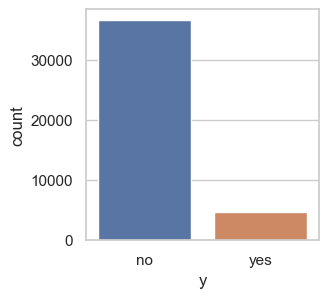

In [14]:
print("Procenat neprihvaćenih i prihvaćenih ponuda\n",df.groupby("y")["y"].count()/len(df)*100)
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(data=df, x = "y", ax=ax);

Zaključak je da je dataset poprilično nebalansiran i stoga kao meru efikasnosti nije moguće koristiti preciznost (accuracy), već je potrebno koristiti kombinovanu f meru ili područje ispod ROC krive

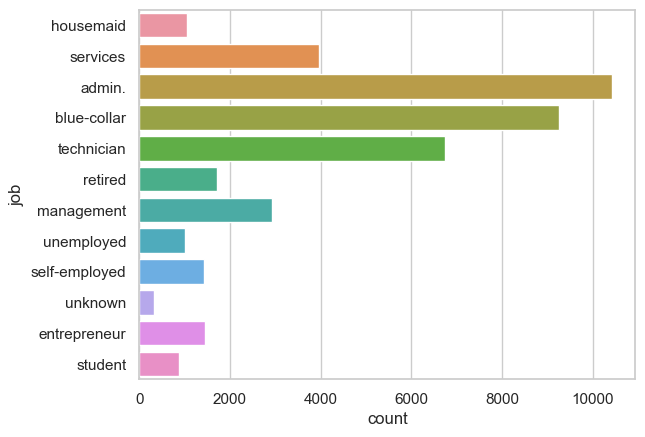

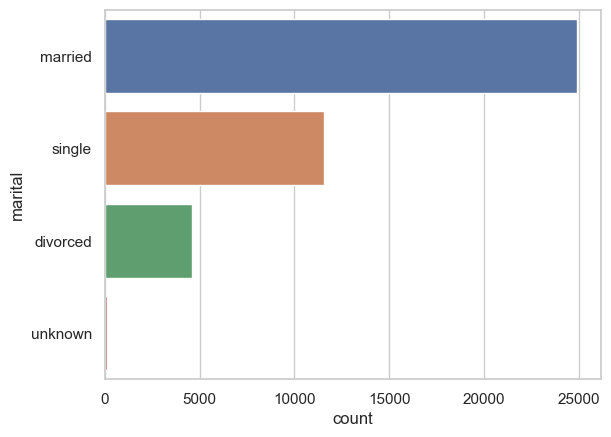

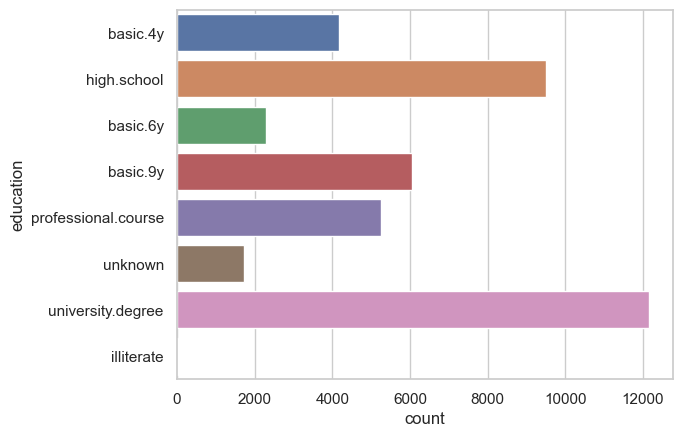

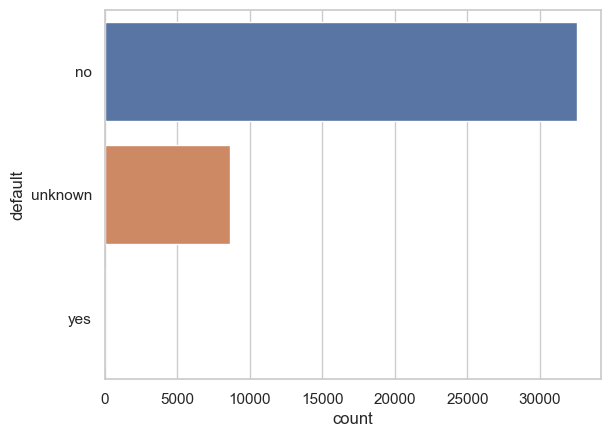

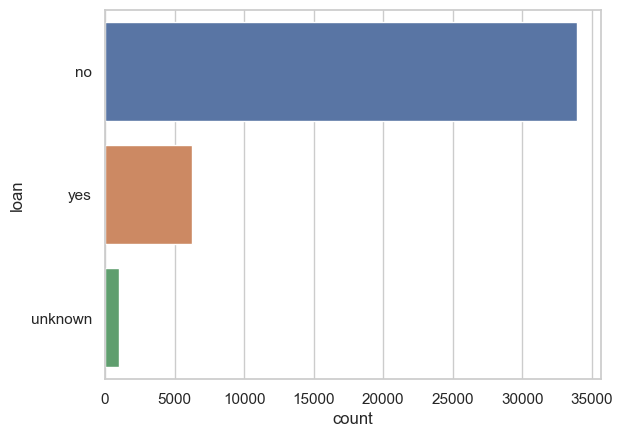

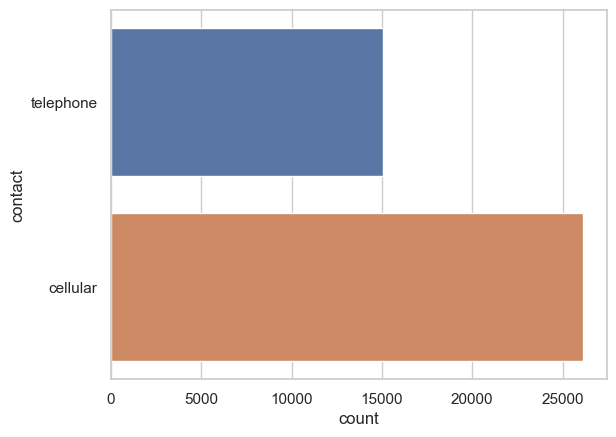

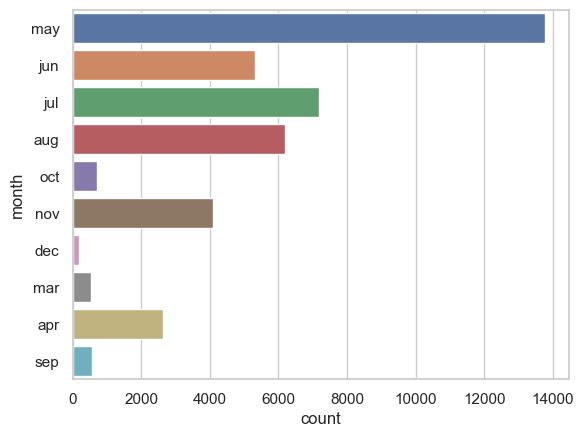

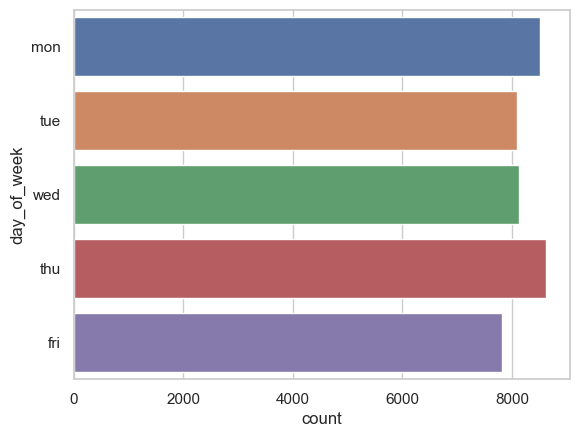

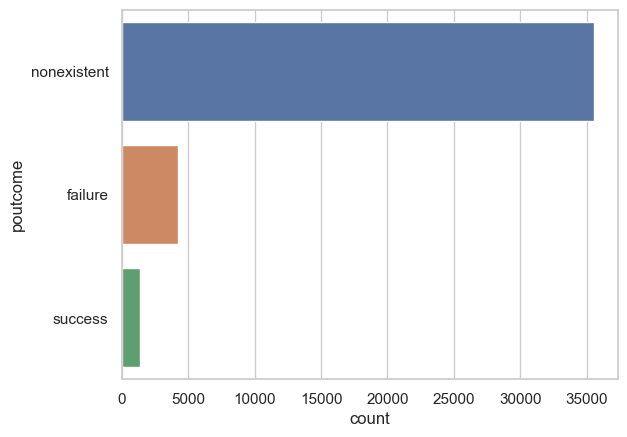

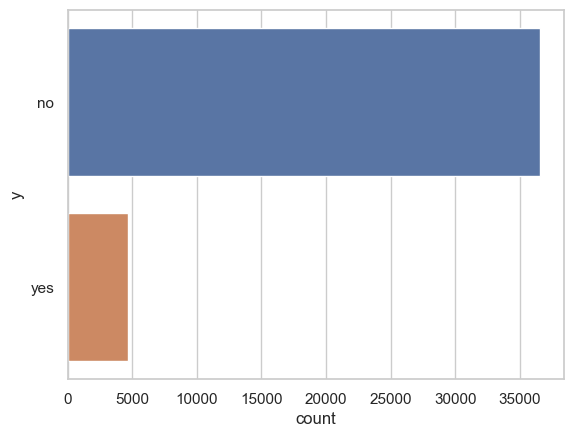

In [15]:
kategoricki_atributi = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for a in kategoricki_atributi:
    fig, ax = plt.subplots();
    sns.countplot(data=df, y=a, ax=ax);

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


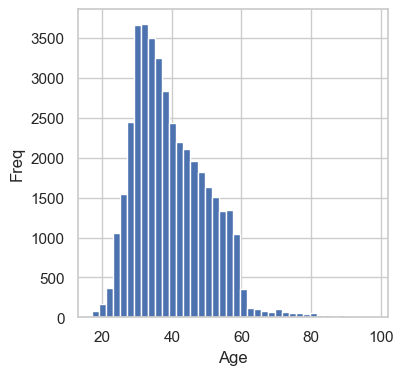

In [17]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlabel("Age")
ax.set_ylabel("Freq")
df["age"].hist(bins=40, ax=ax);

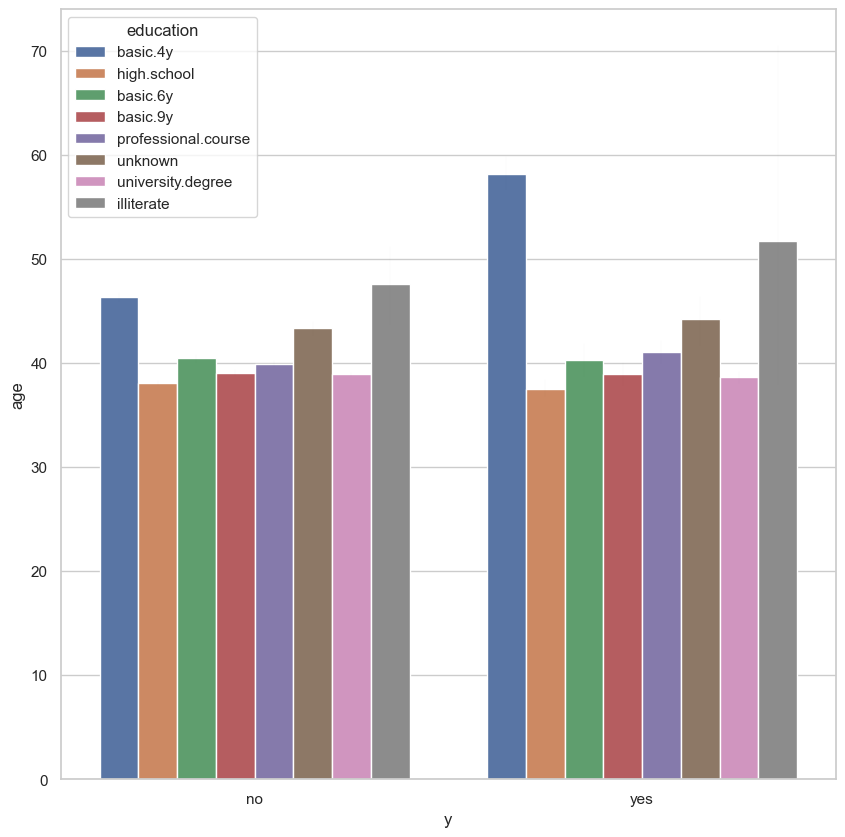

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df, x="y", y="age", hue="education", ax = ax, errwidth=0.01);

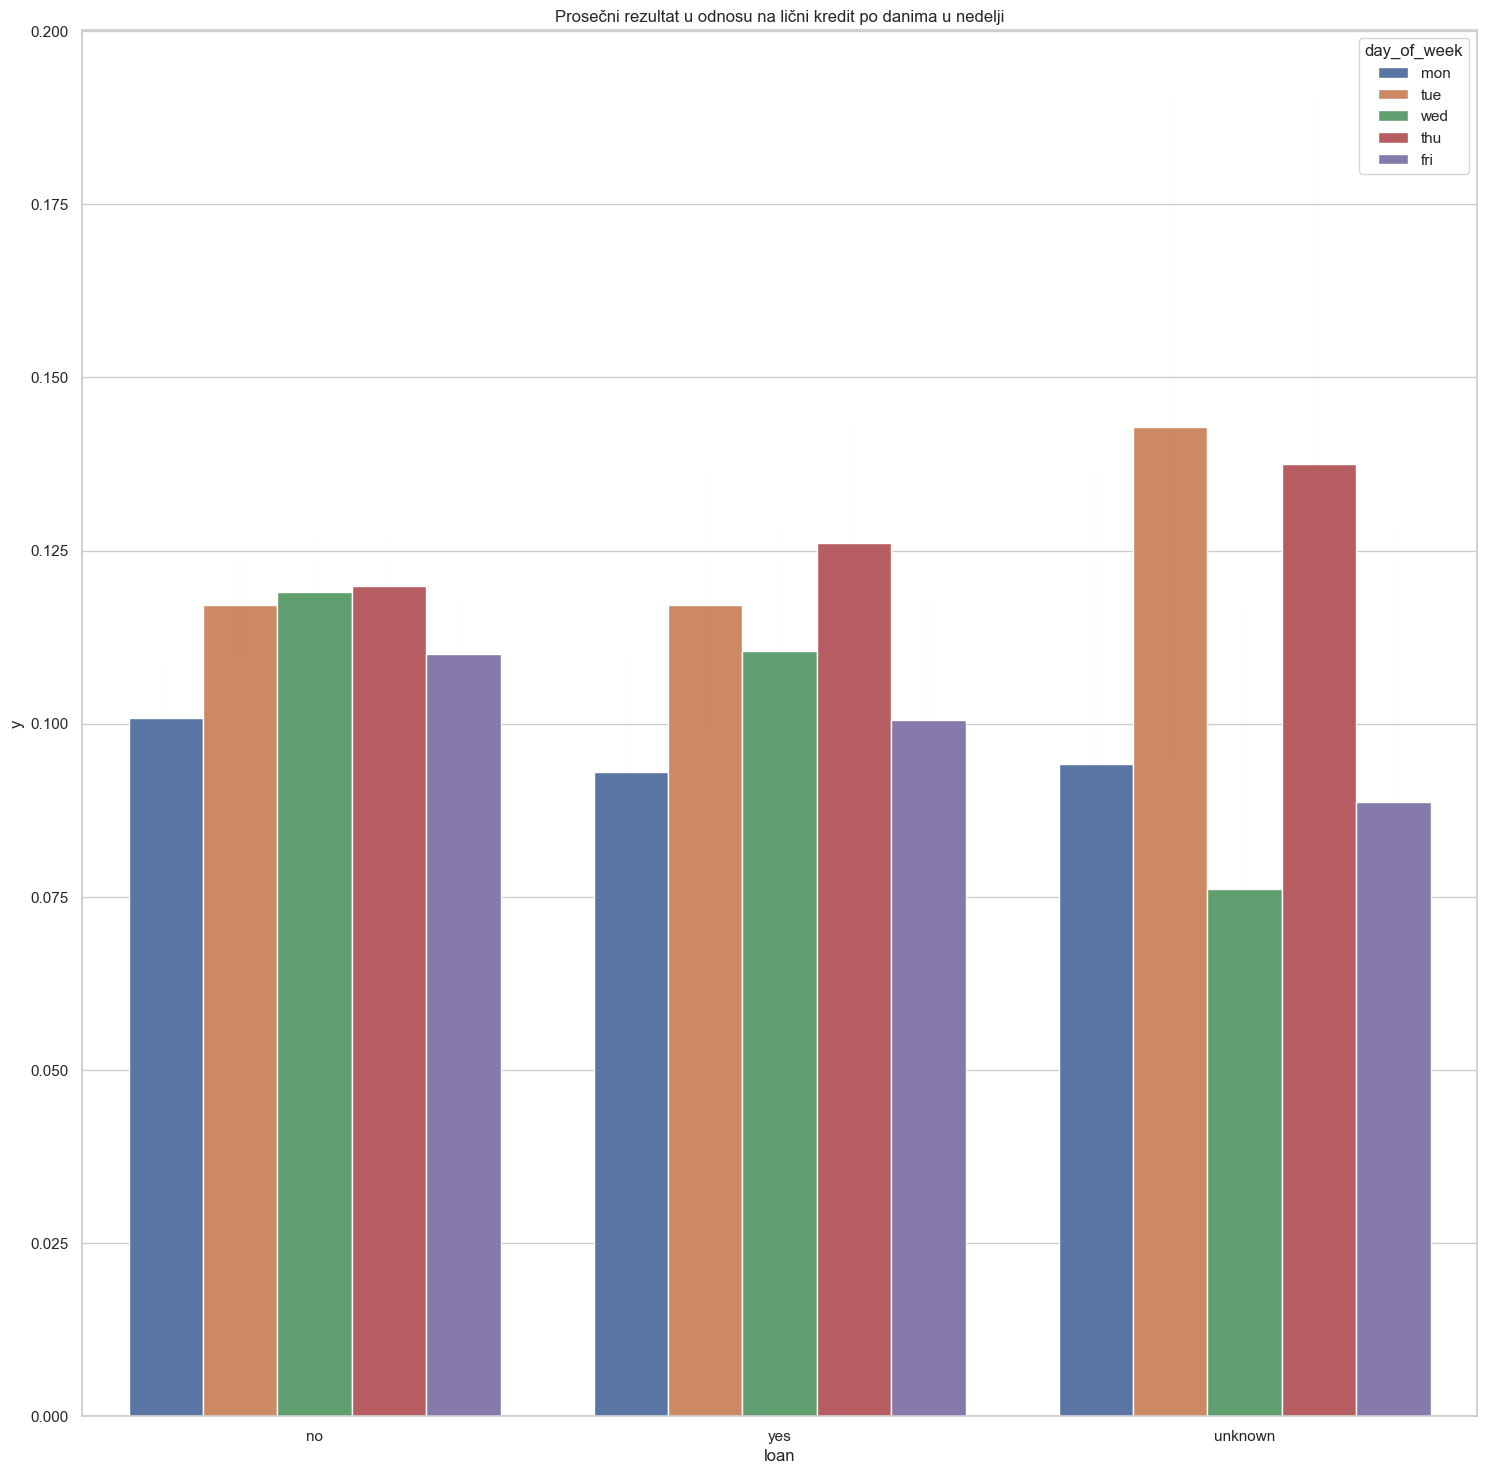

In [19]:
#pretvaranje kategorickog odredisnog atributa u numericki (0,1)
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

fig, ax = plt.subplots(figsize=(18,18))
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na lični kredit po danima u nedelji');

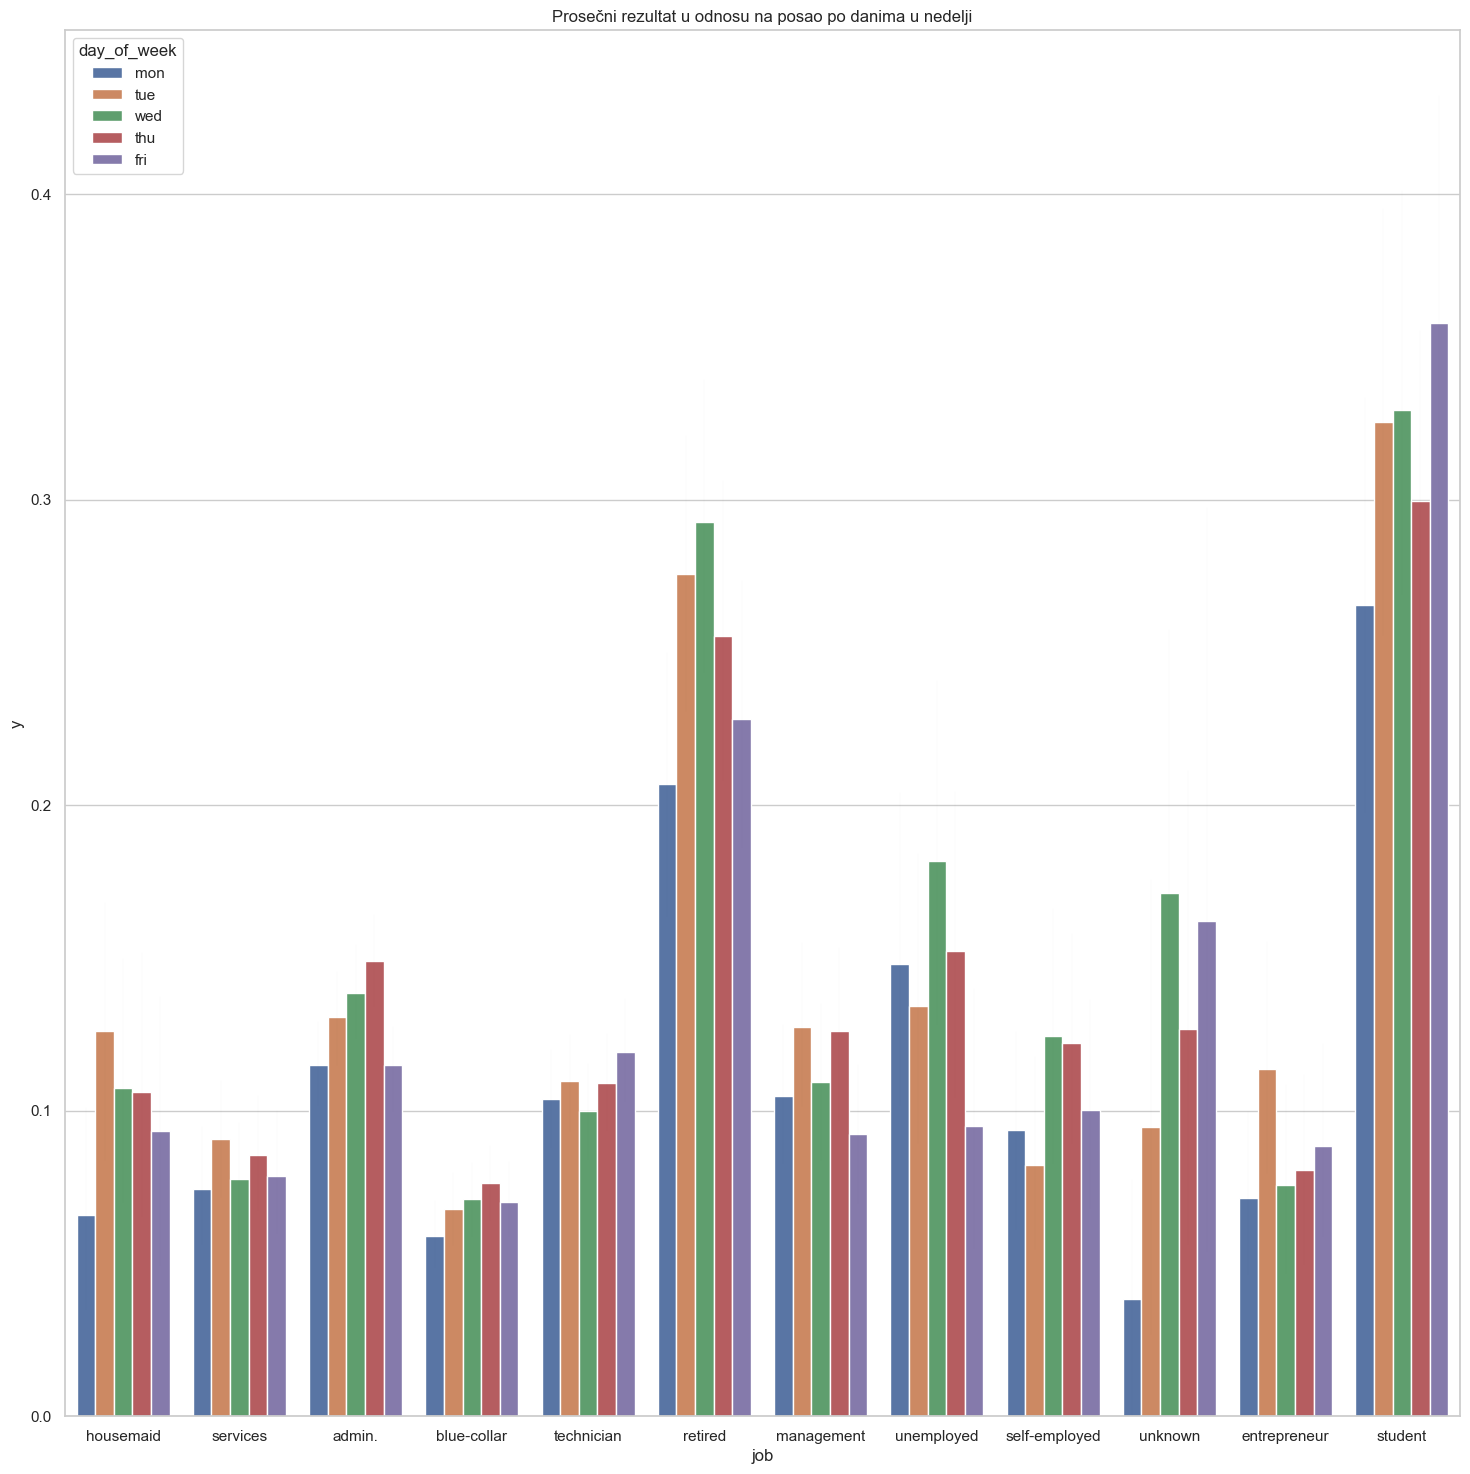

In [20]:
fig, ax = plt.subplots(figsize=(18,18))
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na posao po danima u nedelji');

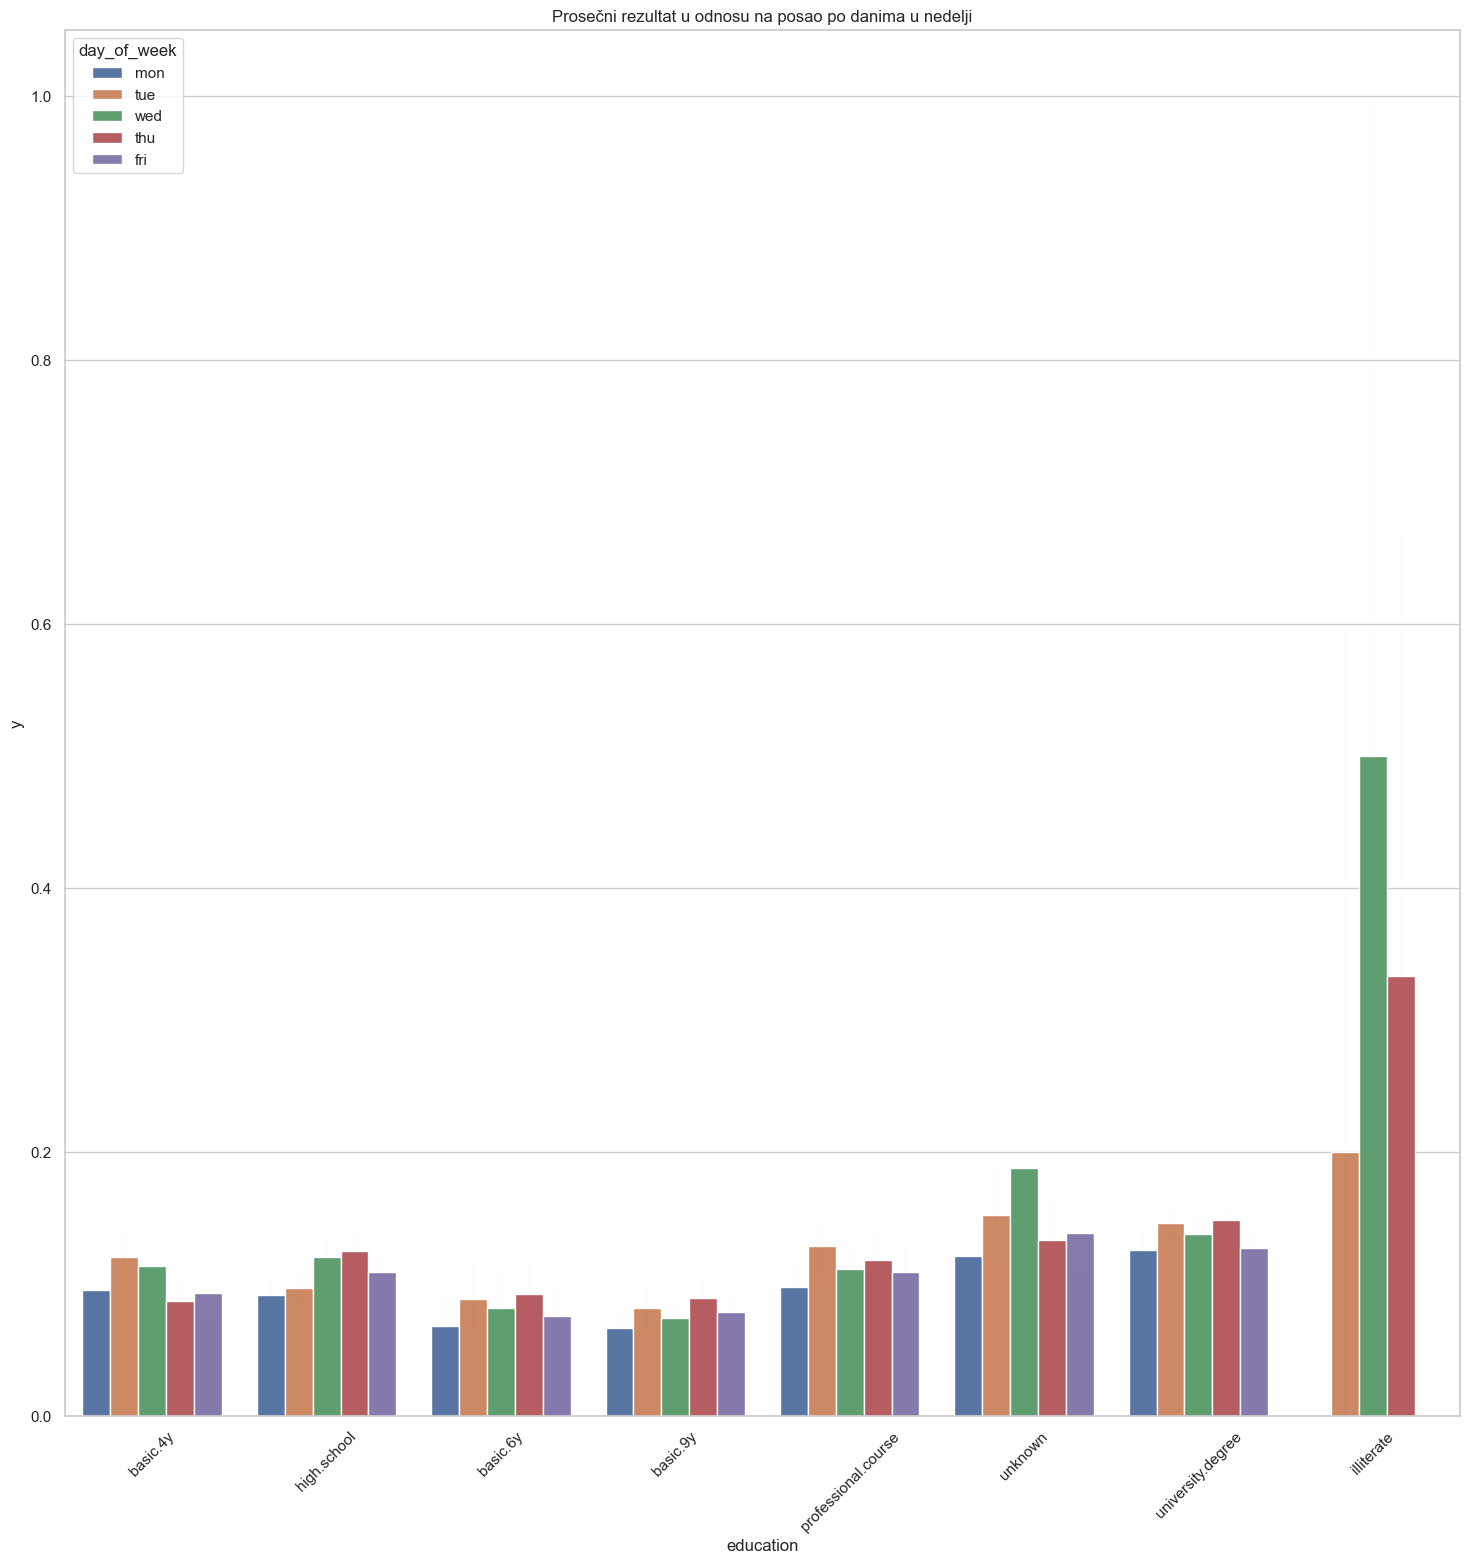

In [21]:
fig, ax = plt.subplots(figsize=(18,18))
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na posao po danima u nedelji')
plt.xticks(rotation=45);

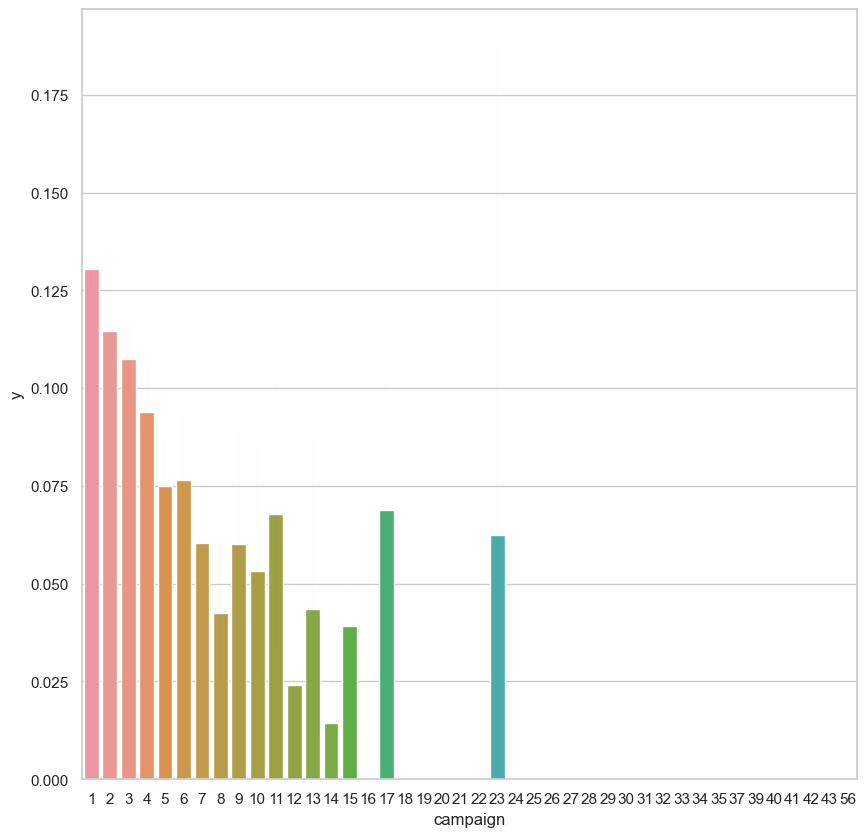

In [22]:
# uspeh u zavisnosti od toga koliko je klijent puta pozvan

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=df, x="campaign", y="y", errwidth=0.01);

y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


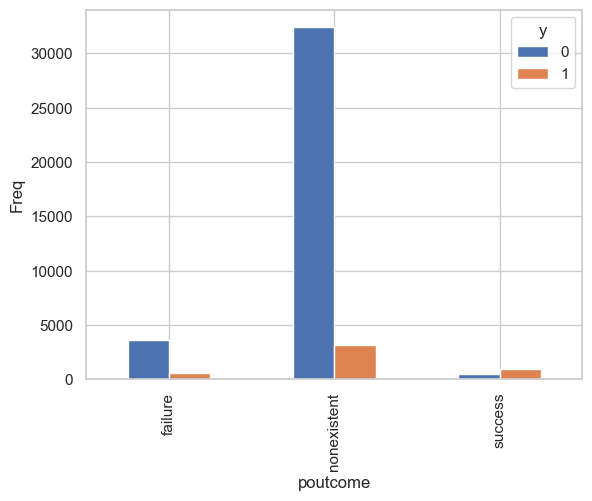

In [23]:
print(pd.crosstab(df.poutcome, df.y))
pd.crosstab(df.poutcome, df.y).plot(kind="bar", ylabel="Freq");

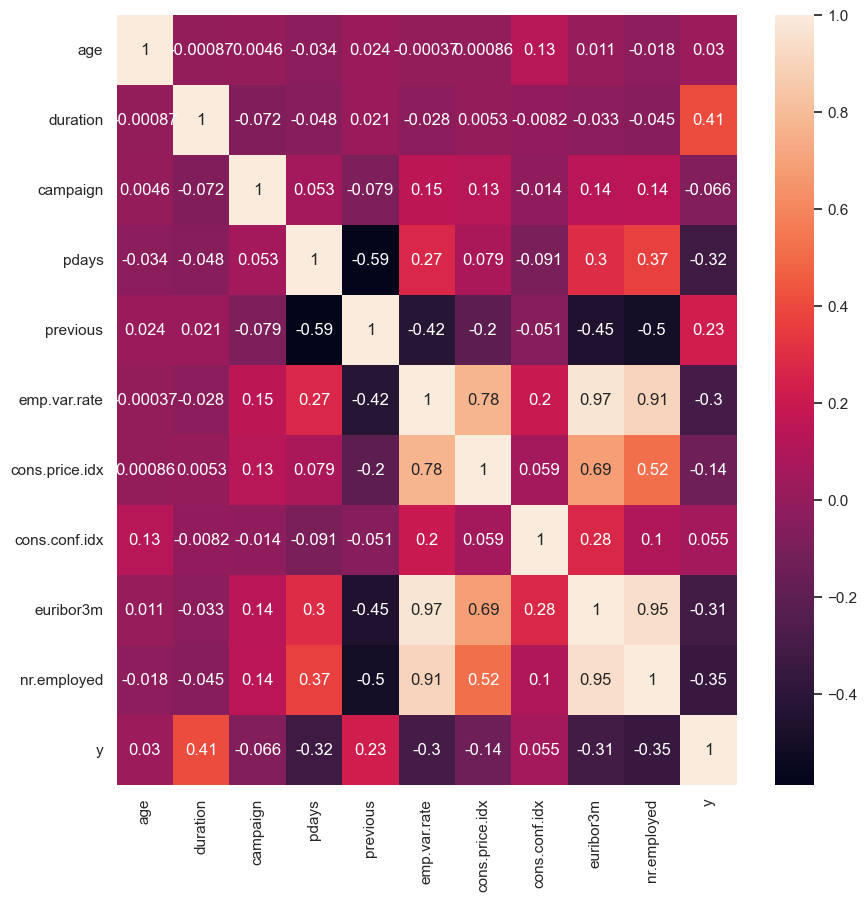

In [24]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data=df_corr, annot=True, ax=ax);